In [31]:
import schemdraw
import schemdraw.elements as elm
import schemdraw.logic as lgc

import matplotlib.pyplot as plt 
import wand
import control_block_diagram

In [32]:
class MeterP(elm.Element):
    def __init__(self, *args, **kwargs):
        super(MeterP, self).__init__(*args, **kwargs)
        self.segments.append(schemdraw.Segment([(0, 0), (2, 0)]))
        self.segments.append(schemdraw.Segment([(1, 1), (1, -1)]))
        self.segments.append(schemdraw.SegmentCircle((1, 0), .5))

        self.anchors['inp_amp'] = (0,0)
        self.anchors['out_amp'] = (2, 0)
        self.anchors['inp_vol'] = (1, 1)
        self.anchors['out_vol'] = (1, -1)

# Basiswissen

## SI-Einheiten

| Formelzeichen | Name        | Einheit |
|---------------|-------------|---------|
| s             | Länge       | m       |
| t             | Zeit        | s       |
| K             | Temperatur  | T       |
| I             | Stromstärke | A       |
| m             | Masse       | kg      |


## Physikalische Größen

## Einheiten gleichungen

## relative- und absoluter Fehler


## Maßnahmen zur Fehlervermeidung

## Übersicht über die Messfehler

### Systematische Fehler

### Dynamische Fehler

### Parallaxe fehler

## Fehlerfortpflanzung

## AD/DA

### Quantisierungsfehler

### Umsetzerkennlinien

### Signalformen

## Rechnen mit dB-Werten

# Messverfahren

## Analoges und Digitales Oszilloskop

## Leisungsmessung im 1-Phasen-System

Leistung $= U\cdot I$

### Stromrichtige Messung

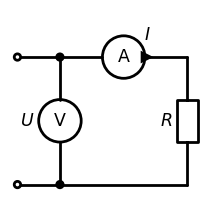

In [33]:
with schemdraw.Drawing() as d:
    #d += elm.Dot(open=True)
    d += elm.Line().right().length(1).dot().idot(open=True)
    an = d.here

    d += (amp := elm.MeterA().right())
    d += elm.CurrentLabelInline(amp).label('$I$').flip().reverse()

    d += elm.ResistorIEC().down().label('$R$')
    d += elm.Line().left().dot()

    d.push()
    d += (vm := elm.MeterV().to(an).label('$U$'))
    d.pop()
    d += elm.Line().left().length(1).dot(open=True)

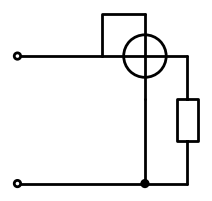

In [34]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += elm.Line().right().length(2)
    d.push()
    d += (mp := MeterP())

    d.pop()
    d += elm.Wire('|-').to((mp.anchors['inp_vol'][0] + 2, mp.anchors['inp_vol'][1]))

    d.here = (mp.anchors['out_amp'][0]+2, mp.anchors['out_amp'][1])
    d += elm.ResistorIEC().down()

    d += elm.Line().left().length(1).dot()
    d.push()
    d += elm.Line().to((mp.anchors['out_vol'][0]+2, mp.anchors['out_vol'][1]))
    d.pop()

    d += elm.Line().left().dot(open=True)

$P_r = U\cdot I$ ... richtige Leistung

$P_a = U'\cdot I$ ... angezeigte Leistung

$P_a = (U_{st} + U)\cdot I = P_{st} + P_r$

- $U'$ ... Eingangsspannung
- $U_{st}$...Spannung am Leistungsmessgerät
- $U$... Spannung am Widerstand

$P = U\cdot I + I^2\cdot R_A$

$R_A$...Innenwiederstand des Amperemeters

### Spannungsrichtig Messung

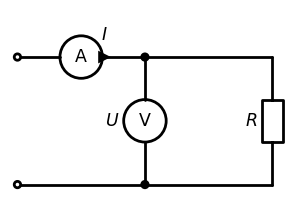

In [35]:
with schemdraw.Drawing() as d:
    #d += elm.Dot(open=True)

    d += (amp := elm.MeterA().right().dot().idot(open=True))
    d += elm.CurrentLabelInline(amp).label('$I$').flip().reverse()
    an = d.here
    d += elm.Line().right()

    d += elm.ResistorIEC().down().label('$R$')
    d += elm.Line().left().dot()

    d.push()
    d += elm.MeterV().to(an).label('$U$')
    d.pop()
    d += elm.Line().left().dot(open=True)

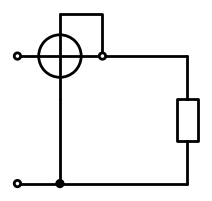

In [36]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += (mp := MeterP())

    d += elm.Wire('n').at(mp.anchors['out_amp']).to(mp.anchors['inp_vol'])

    d.here = mp.anchors['out_amp']
    d += elm.Dot(open=True)
    d += elm.Line().right().length(2)

    d += elm.ResistorIEC().down()
    d += elm.Line().left()

    d.push()
    d += elm.Line().to(mp.anchors['out_vol'])
    d.pop()
    d += elm.Line().left().length(1).idot().dot(open=True)

$I\cdot U$  ...richtige Leistung

$I'\cdot U$...angezeigte Leistung

$P_a = U\cdot(I_{sp} + I) = P_{sp} + P_r$


- $I'$ ... Eingangsstrom
- $I_{st}$...Strom durch Leistungsmessgerät
- $I$... Strom am Widerstand


$P = U\cdot I - \frac{U^2}{R_V}$

$R_V$...Innenwiederstand Voltmeter

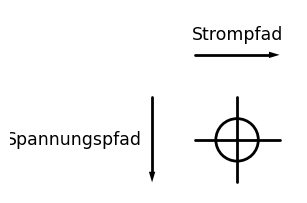

In [37]:
with schemdraw.Drawing() as d:
    d += (mp := MeterP())

    (vix, viy), (vox, voy) = mp.anchors['inp_vol'], mp.anchors['out_vol']
    (aix, aiy), (aox, aoy) = mp.anchors['inp_amp'], mp.anchors['out_amp']

    d += (elm.Line(arrow='->')
          .at((vix-2, viy))
          .to((vox-2, voy))
          .label('Spannungspfad'))

    d += (elm.Line(arrow='->')
          .at((aix, aiy + 2))
          .to((aox, aoy + 2))
          .label('Strompfad'))

### Leistungsarten

$P = U\cdot I\cdot (cos\varphi + i\cdot sin\varphi)$

### Wirkleistungsmessung

$P = U\cdot I \cdot cos \varphi$

Realteil der komplexen Leistung.

$P = \frac{1}{T}\cdot \int_0^T u(t)\cdot i(t) dt = U_{eff} \cdot I_{eff}\cdot cos\varphi$

- $u(t) = \hat{u}\cdot sin(\omega\cdot t + \varphi_u$
- $i(t) = \hat{i}\cdot sin(\omega\cdot t + \varphi_i$
- $U_{eff} = \frac{\hat{u}}{\sqrt{2}}$
- $I_{eff} = \frac{\hat{i}}{\sqrt{2}}$

### Blindleistunsmessung

$Q = U\cdot I \cdot cos \varphi$

Imagiärteil der komplexen Leistung.

$Q = U_{eff} \cdot I_{eff}\cdot sin\varphi$

- $u(t) = \hat{u}\cdot sin(\omega\cdot t + \varphi_u$
- $i(t) = \hat{i}\cdot sin(\omega\cdot t + \varphi_i$
- $U_{eff} = \frac{\hat{u}}{\sqrt{2}}$
- $I_{eff} = \frac{\hat{i}}{\sqrt{2}}$

Wir über $90°$ ($\pi~rad$) Phasenverschiebung gemssen.
Bspw. in Spannungspfad.

### Scheinleistungsmessung

Die Komplexe Leistung, zusammengesetzt aus Wirk- und Blindleistung

$S = P + j\cdot Q = |S| \cdot cos\varphi + j\cdot |S| \cdot sin\varphi$


$S^2 = P^2 + Q^2$

## Sensorik

### Passive Sensoren

### Aktive Sensoren

### Temperatursensoren

### Spannungsabhängiger Widerstand

### Fotowiderstand

## Messbrücke

Allgemein:
$U_b = U_0 \cdot \left(\frac{R_2}{R_1 + R_2} - \frac{R_4}{R_4+R_3}\right)$

### Viertelbrücke

**Viertel**brücke $\Rightarrow$ 1 von 4 Widerständen änderbar

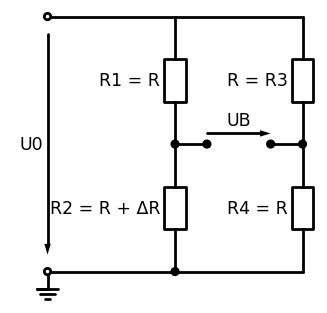

In [38]:
with schemdraw.Drawing() as d:
    d0 = d.add(elm.Dot(open=True))
    d += elm.Line()
    
    d.push()
    d += elm.ResistorIEC().down().label('R1 = R')
    d.push()
    
    d += elm.Dot()
    d += elm.Line().length(.75).right()
    d1 = d.add(elm.Dot())
    
    d.pop()
    d += elm.ResistorIEC().down().label('R2 = R + ΔR')
    
    d += (elm.Dot())
    d += elm.Line().left()
    de = d.add(elm.Dot(open=True))
    d += elm.Ground()
    
    d.pop()
    d += elm.Line()
    d += elm.ResistorIEC().down().label('R = R3')
    d += elm.Dot()
    d.push()
    
    d += elm.ResistorIEC().down().label('R4 = R')
    d += elm.Line().left()
    
    d.pop()
    d += elm.Line().length(.75).left()
    d2 = d.add(elm.Dot())
    
    d += (elm.Arrow()
        .at((d1.start[0], d1.start[1] + 0.25))
        .to((d2.start[0], d2.start[1] + 0.25))
        .label('UB'))
    d += (elm.Arrow()
          .at((d0.start[0], d0.start[1]-.4))
          .to((de.start[0], de.start[1]+.4))
          .label('U0'))

$U_B = U_{R2} - U_{R4} = U_0 \cdot \left( \frac{R_2}{R_1 + R_2} - \frac{R_4}{R_3 + R_4} \right)$  
$R_1 = R_3 = R_4 = R$  
$R_2 = R + \Delta R$  
$\therefore U_B = U_0 \cdot \frac{\Delta R}{4R + \Delta R} \approx U_0 \cdot \frac{\Delta R}{4R}$

### Halbbrücke

**Halb**brücke $\Rightarrow$ 2 von 4 Widerständen änderbar

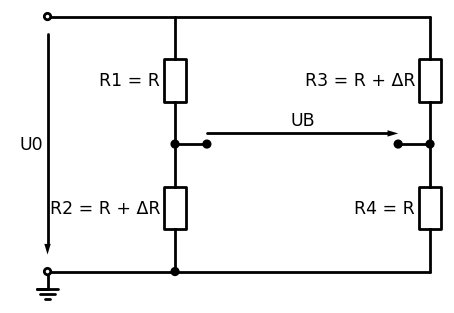

In [39]:
with schemdraw.Drawing() as d:
    d0 = d.add(elm.Dot(open=True))
    d += elm.Line()
    
    d.push()
    d += elm.ResistorIEC().down().label('R1 = R')
    d.push()
    
    d += elm.Dot()
    d += elm.Line().length(.75).right()
    d1 = d.add(elm.Dot())
    
    d.pop()
    d += elm.ResistorIEC().down().label('R2 = R + ΔR')
    
    d += (elm.Dot())
    d += elm.Line().left()
    de = d.add(elm.Dot(open=True))
    d += elm.Ground()
    
    d.pop()
    d += elm.Line().length(6)
    d += elm.ResistorIEC().down().label('R3 = R + ΔR')
    d += elm.Dot()
    d.push()
    
    d += elm.ResistorIEC().down().label('R4 = R')
    d += elm.Line().left().length(6)
    
    d.pop()
    d += elm.Line().length(.75).left()
    d2 = d.add(elm.Dot())
    
    d += (elm.Arrow()
        .at((d1.start[0], d1.start[1] + 0.25))
        .to((d2.start[0], d2.start[1] + 0.25))
        .label('UB'))
    d += (elm.Arrow()
          .at((d0.start[0], d0.start[1]-.4))
          .to((de.start[0], de.start[1]+.4))
          .label('U0'))

$U_B = U_{R2} - U_{R4} = U_0 \cdot \left( \frac{R_2}{R_1 + R_2} - \frac{R_4}{R_3 + R_4} \right)$  
$R_1 = R_4 = R$  
$R_2 = R_3 = R + \Delta R$  
$\therefore U_B = U_0 \cdot \frac{\Delta R}{2R}$
Doppelte Spannungsempfindlichkeit im Vergleich zur Viertelbrücke

### Vollbrücke

Alle Widerstände sind veränderbar
    und in der Form $R \pm \Delta R$,
    wobei $R_1$ und $R_2$ sowie $R_3$ und $R_4$ gegengleich sind

$U_B = U_0 \cdot \frac{\Delta R}{R}$

Wieder Doppelte Empfindlichkeit im Vergleich zur Halbbrücke

## Digitale Frequenzmessung

### Schaltung

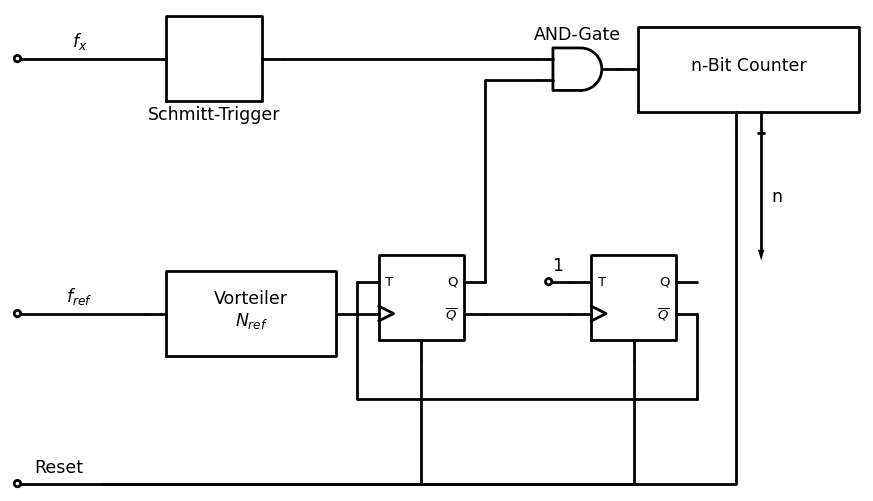

In [121]:
with schemdraw.Drawing() as d:
    d += elm.Line().idot(open=True).label('$f_x$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='inp'),
        elm.IcPin(side='right', anchorname='oup')
    ]).anchor('inp').drop('oup').label('Schmitt-Trigger', 'B')

    d += elm.Line().length(6)
    d += (ACmp := lgc.And().anchor('in1').label('AND-Gate').drop('out'))

    d += (counter := elm.Ic(pins=[
        elm.IcPin(side = 'left', anchorname='in1'),
        elm.IcPin(side = 'bottom', anchorname='out1'),
        elm.IcPin(side = 'bottom', anchorname='out2')
    ], edgepadW=2).anchor('in1').label('n-Bit Counter', 'center').drop('out1'))

    d.here = (0, -6)
    d += elm.Line().idot(open=True).label('$f_{ref}$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='in1'),
        elm.IcPin(side='right', anchorname='out')
    ], edgepadW=2).label('Vorteiler\n$N_{ref}$').anchor('in1').drop('out')

    def t_ff():
        return elm.Ic(pins=[
            elm.IcPin('>', side='left'),
            elm.IcPin('T', side='left'),
            elm.IcPin('$\overline{Q}$', side='right', anchorname='nQ'),
            elm.IcPin('Q', side='right'),
            elm.IcPin(side='B', anchorname='res'),
        ])
    d += (ff1 := t_ff().anchor('>').drop('nQ'))
    d += elm.Line().right().length(2)
    d += (ff2 := t_ff().anchor('>').drop('nQ'))

    d += elm.Line().down().length(2)
    d += elm.Wire('-|').to(ff1.T)

    d += elm.Line().left().at(ff2.T).length(.5).dot(open=True).label('1')

    d += elm.Wire('|-').at(ff1.Q).to(ACmp.in2)

    d.here = (0, -10)
    d += elm.Line().idot(open=True).label('Reset').length(2)
    d.push()

    d += elm.Wire('-|').to(ff1.res)
    d.pop(); d.push()
    d += elm.Wire('-|').to(ff2.res)
    d.pop(); d.push()
    d += elm.Wire('-|').to(counter.out1)

    d += elm.Line(arrow='|->').at(counter.out2).down().label('n', 'bottom')

### Spannungsdiagramme

![](mtrs_media/Uf_diags.png)

### Berechnung der relevanten Größe

$N = f_x \cdot T_{ref}$

$f_x = \frac{T_{ref}}{N}$

## Digitale Periodendauermessung

### Schaltung

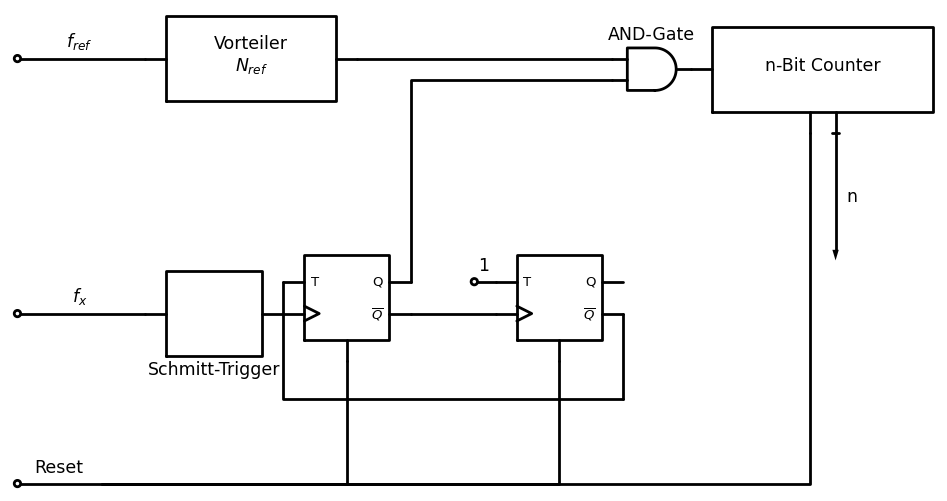

In [123]:

with schemdraw.Drawing() as d:
    d += elm.Line().idot(open=True).label('$f_{ref}$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='in1'),
        elm.IcPin(side='right', anchorname='out')
    ], edgepadW=2).label('Vorteiler\n$N_{ref}$').anchor('in1').drop('out')

    d += elm.Line().length(6)
    d += (ACmp := lgc.And().anchor('in1').label('AND-Gate').drop('out'))

    d += (counter := elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='in1'),
        elm.IcPin(side='bottom', anchorname='out1'),
        elm.IcPin(side='bottom', anchorname='out2')
    ], edgepadW=2).anchor('in1').label('n-Bit Counter', 'center').drop('out1'))

    d.here = (0, -6)

    d += elm.Line().idot(open=True).label('$f_x$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='inp'),
        elm.IcPin(side='right', anchorname='oup')
    ]).anchor('inp').drop('oup').label('Schmitt-Trigger', 'B')

    def t_ff():
        return elm.Ic(pins=[
            elm.IcPin('>', side='left'),
            elm.IcPin('T', side='left'),
            elm.IcPin('$\overline{Q}$', side='right', anchorname='nQ'),
            elm.IcPin('Q', side='right'),
            elm.IcPin(side='B', anchorname='res'),
        ])


    d += (ff1 := t_ff().anchor('>').drop('nQ'))
    d += elm.Line().right().length(2)
    d += (ff2 := t_ff().anchor('>').drop('nQ'))

    d += elm.Line().down().length(2)
    d += elm.Wire('-|').to(ff1.T)

    d += elm.Line().left().at(ff2.T).length(.5).dot(open=True).label('1')

    d += elm.Wire('|-').at(ff1.Q).to(ACmp.in2)

    d.here = (0, -10)
    d += elm.Line().idot(open=True).label('Reset').length(2)
    d.push()

    d += elm.Wire('-|').to(ff1.res)
    d.pop()
    d.push()
    d += elm.Wire('-|').to(ff2.res)
    d.pop()
    d.push()
    d += elm.Wire('-|').to(counter.out1)

    d += elm.Line(arrow='|->').at(counter.out2).down().label('n', 'bottom')


### Spannungsdiagramme

![](mtrs_media/Uf_diags_inv.png)

### Berechnung der relevanten Größe

$N = T_x \cdot f_{ref}$


$T_x = \frac{f_{ref}}{N}$

## Digitale Phasenverschiebungsmessung

**Anforderungen**:
- $f_1 = f_2 = const$
- Gleichanteil = 0
    HP am Eingang
- gleiche Signalform

### Schaltung

![](mtrs_media/dphi_cir.png)

### Spannungsdiagramme

![](mtrs_media/dphi_diags.png)

### Berechnung der relevanten Größe

## U-f Umsetzer

### Schaltung

### Spannungsdiagramme

### Berechnung der relevanten Größe

### Anwendungsbeispiele

## DMS-Messbrücke

### Schaltungen


### OPV-Verstärkerschaltung

### Berechnung/Herleitung der Ausgangsgröße

### Biasstromkompensation

# Signalaufbereitung

## Digitale Verarbeitungskette

### Anti Aliasing Filter

Um zu verhindern, dass das Abtasttheorem verletzt wird, werden Anti-Aliasing Filter verwendet.
Diese verhindern, 
    dass die Signalfrequenz höher ist als die Maximal erlaubte

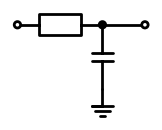

In [41]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().length(2).idot(open=True).dot()
    d.push()
    d += elm.Capacitor().down().length(1.5)
    d += elm.Ground()
    d.pop()
    
    d += elm.Line().length(1).dot(open=True)

### S&H Glied

Für die AD-Umwandlung muss das Eingangssignal konstant Gehalten werden. 
Dafür werden **S**ample und **H**old Glieder verwendet

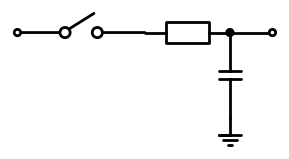

In [42]:
with schemdraw.Drawing() as d:
    d += elm.Switch().idot(open=True)
    d += elm.ResistorIEC().length(2).dot()
    d.push()
    d += elm.Capacitor().down().length(2)
    d += elm.Ground()
    d.pop()
    
    d += elm.Line().length(1).dot(open=True)

### Abtasttheorem

Die Abtastfrequenz muss mindestens doppelt so hoch sein wie die Signalfrequenz.

Wenn das Abtasttheorem verletzt wird, 
    so werden die hohen Frequenzanteile als niedrigere aufgefasst,
    welche das Signal verzerren

### Umsetzungskennlinien

## AD-Wandler

### Sukzessive Approximationsverfahren

#### Schaltung

In [43]:
SAR = elm.Ic(pins=[
        elm.IcPin(side='top', anchorname='SH'),
        elm.IcPin(name='Start', side='top'),
        elm.IcPin(name='Reset', side='top'),
        elm.IcPin(anchorname='in', side='left'),
        elm.IcPin(name='Finished', side='right'),
        elm.IcPin(anchorname='out', side='bottom')
    ],
    edgepadW= .5,
    pinspacing=1
).label('SAR', 'center')
#display(SAR)

In [44]:
DA_conv = elm.Ic(
    pins=[
        elm.IcPin(side='left', name='in'),
        elm.IcPin(side='right', name='out'),
        elm.IcPin(side='top', anchorname='ref')
    ],
    edgepadW = 2
).label('DA-Wandler', 'center')
#display(DA_conv)

In [45]:
SH = elm.Ic(
    pins=[
        elm.IcPin(side='left', anchorname='in'),
        elm.IcPin(side='right', anchorname='out'),
        elm.IcPin(side='top', anchorname='trigger')
    ]
).label('S and H', 'center')
#display(SH)

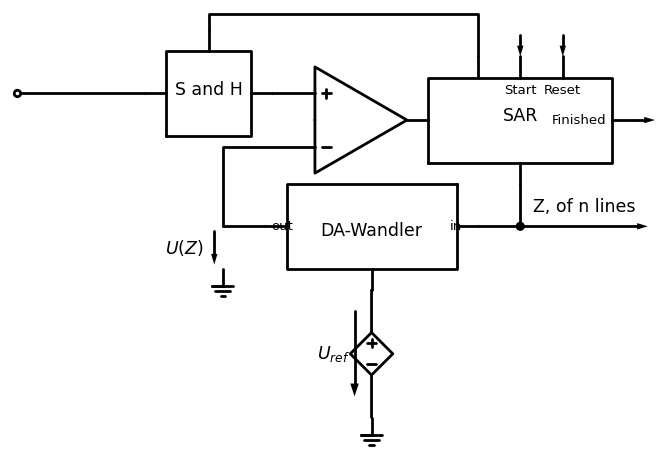

In [46]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += elm.Line()
    d += SH.anchor('in').drop('out')
    d += elm.Line().length(1)
    d += (cmp := elm.Opamp().flip().anchor('in2'))
    d += SAR.anchor('in')
    d.here = SAR.out
    d += elm.Line().down().length(1)
    d.push()
    d += elm.Line().left().length(1)
    d += DA_conv.anchor('in')
    d += elm.Line().at(DA_conv.out).left().length(1)
    
    d.push()
    d += (g1 := elm.Ground().at((d.here[0], d.here[1]-1)))
    d.pop()
    d.push()
    d += (elm.Line(arrow='->').at((d.here[0]-.2, d.here[1]-.1)).to((d.here[0]-.2, g1.start[1]+.1))
          .label('$U(Z)$'))
    d.pop()
    d += elm.Wire('|-').to(cmp.in1)
    
    d.pop()
    d += elm.Dot()
    d += elm.Line(arrow='->').right().label('Z, of n lines')
    
    
    d += elm.Wire('n').at(SAR.SH).to(SH.trigger)
    
    d += elm.Line(arrow='->').at(SAR.Finished).right().length(.5)
    d += elm.Line(arrow='<-').at(SAR.Start).up().length(.5)
    d += elm.Line(arrow='<-').at(SAR.Reset).up().length(.5)
    
    d += (ref := elm.SourceControlledV().reverse()
          .at(DA_conv.ref).down())
    d += elm.CurrentLabel().reverse().at(ref).label('$U_{ref}$')
    d += elm.Ground()

#### Funktionsprinzip

1. Die Bits des SAR (**S**ukkzessive ***A**pprox **R**egister) sind alle auf 0
    Man hat einen Zeiger auf ein Bit, 
        welches am Anfang auf das **MSB** zeigt.
2. Das Bit des Zeigers wird auf 1 gesetzt,
3. Über einen DA-Wandler wird der Ausgang wieder zu einer analogen Spannung gewandelt.
4. Wenn die Spannung nun größer als die Eingangsspannung ist,
    wird das Bit wieder auf 0 gesetzt
   Ansonsten bleibt es auf 1.  
5. Wenn der Zeiger noch nicht das **LSB** erreicht hat,
       geht er um eine stelle zum nächsten weniger Werten Bit.
   Wenn der Zeiger das LSB erreicht hat, 
       so ist die Wandlung beendet und das *Finished*-Flag wird auf 1 gesetzt
       
Laufzeit: $O(log~n)$

#### Diagramme

Beispiel mit n=4 Bit und $U_e = 10.7V$, der Wert des LSB Beträgt $1V$ (MSB=> $8V$)

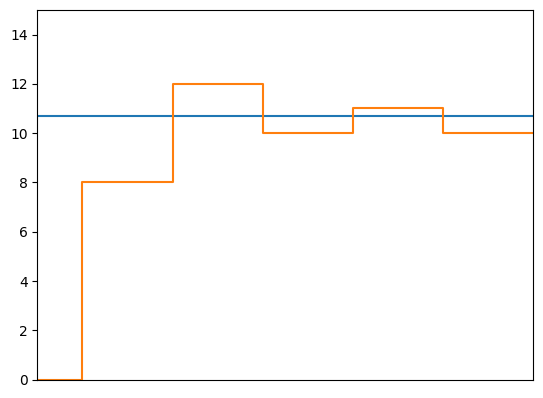

In [47]:
plt.figure(1)
plt.plot([-.1, 1], [10.7, 10.7])
plt.plot([-.1, 0,
         0, 0.2,
         0.2, .4,
         .4, .6,
         .6, .8,
         .8, 1],
        [0, 0,
        8, 8,
        12, 12,
        10, 10,
        11, 11,
        10, 10])

plt.xlim([-.1, 1])
plt.ylim([0, 15])
plt.xticks([])
plt.show()

#### Herleitungen

$U(z) = U_{ref}\cdot\frac{t}{t_{max} +1}\cdot U_e$  
$Z = \frac{Z_{max} + 1}{U_{ref}} \cdot U_e$

### Single Slope:

#### Schaltung

![](https://referate.mezdata.de/sj2006/09analogdigitalwandlung_danielerkert/res-wikipedia/single_slope_dac.png)

*Bei uns S&H Glied am Eingang*
*= kann bei uns ein \& sein*

#### Funktionsprinzip

- Es wird ein Sägezahn mit dem Eingang und mit Ground verglichen.
- Wenn der Sägezahn größer 0 ist und kleiner als das Eingangssignals 
    so ist das Und Gatter der Beiden Komparatoren HIGH.
  Durch ein UND Gatter mit einem Clock Signal, 
    wird dieses nur in diesen Zeitraum durchgelassen.
- Bei jeder durchgelassenen Clockflanke zählt ein Counter nach oben.

#### Diagramme

Text(0, 0.5, '$U_y$')

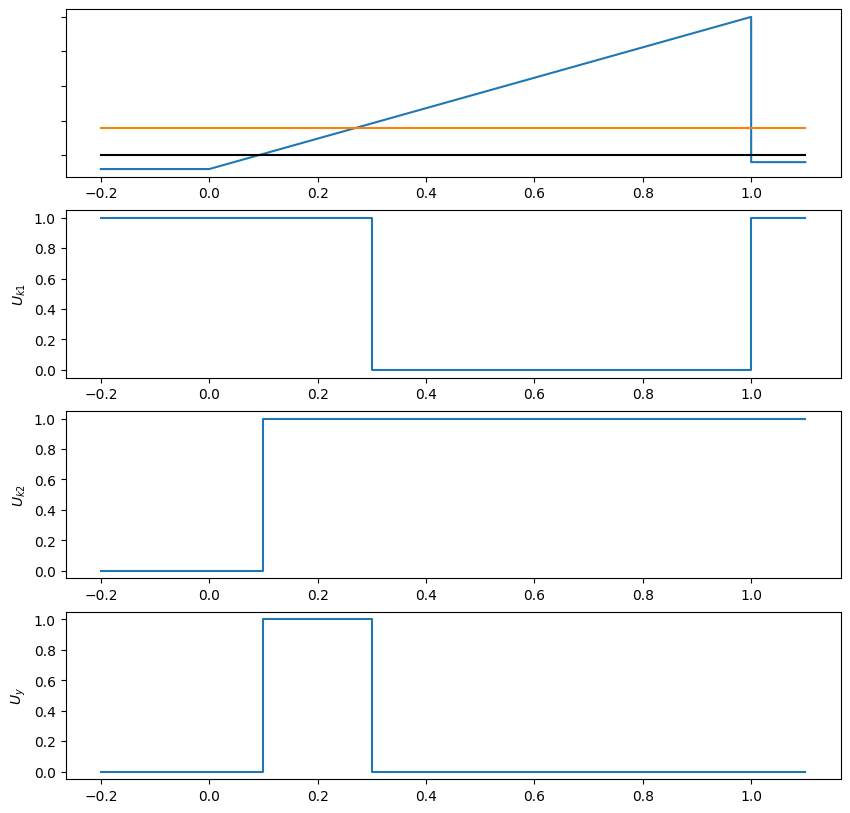

In [48]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)

fig.set_size_inches(10, 10)

ax1.plot([-.2, 0, 1, 1, 1.1], [-1, -1, 10, -.5, -.5])
ax1.plot([-.2, 1.1], [2, 2])
ax1.plot([-.2, 1.1], [0, 0], color='black')
ax1.set_yticklabels([])

ax2.plot([-.2, .3, .3, 1, 1, 1.1], [1, 1, 0, 0, 1, 1])
ax2.set_ylabel('$U_{k1}$')

ax3.plot([-.2,.1 ,.1, 1.1], [0, 0, 1, 1])
ax3.set_ylabel('$U_{k2}$')

ax4.plot([-.2, .1, .1, .3, .3, 1.1], [0, 0, 1, 1, 0, 0])
ax4.set_ylabel('$U_y$')

#### Herleitungen

$N = \Delta t \cdot f_{clk}$

### Dual Slope:

#### Schaltung

![](http://www.vias.org/mikroelektronik/img/adcdslp.png)

#### Funktionsprinzip

- Es wird nach der Eingangsspannung invers für die Zeit $t_1$ Integriert
- Danach wird nach einer Referenzspannung nach oben integriert ($-$\&$-$ $\Rightarrow~~+$)
- Während des 2. Integrierens zählt ein Counter nach oben,
    dieser Vorgang wird abgebrochen, wenn der Integrierte Wert $~0$ erreicht (Komparator)

**WICHTIG:** $t_1$ ist konstant 

Da die Flächen gleich sind, fallen die $RC$ Komponenten weg, wodurch man nicht von Bauteildriften betroffen ist.

#### Diagramme

![](https://ars.els-cdn.com/content/image/3-s2.0-B9780750687034000067-f06-81-9780750687034.gif)

#### Herleitungen

Die Fläche unter beiden Analogwerten ist gleich.

$-\frac{1}{RC} \int_0^{t_1} U_e dt = -\frac{1}{RC} \int_{t_1}^{t_2 + t_1} U_{ref}dt$  
$U_e\cdot t_1 = U_{ref}\cdot t_1 + U_{ref}\cdot t_2 - U_{ref}\cdot t_1$  
$U_e\cdot t_1 = U_{ref} \cdot t_2$  
$t_1 = 2^n\cdot T_{clk} \wedge t_2 \cdot Z\cdot T_{clk}$  
$U_e \cdot 2^n \cdot T_{clk} = U_{ref}\cdot Z \cdot T_{clk}$  
$Z = \frac{U_e}{U_{ref}} \cdot (Z_{max} + 1})$

### Zählverfahren

#### Schaltung

In [49]:
DA_conv = elm.Ic(
    pins=[
        elm.IcPin(side='left', name='in'),
        elm.IcPin(side='right', name='out'),
        elm.IcPin(side='top', anchorname='ref')
    ],
    edgepadW = 2
).label('DA-Wandler', 'center')

In [50]:
SH = elm.Ic(
    pins=[
        elm.IcPin(side='left', anchorname='in'),
        elm.IcPin(side='right', anchorname='out'),
    ]
).label('S and H', 'center')

In [51]:
counter = elm.Ic(
    pins=[
        elm.IcPin(side='left', anchorname='in'),
        elm.IcPin(side='bottom', anchorname='out'),
        elm.IcPin(name='clk<', side='right', anchorname='clk'),
        elm.IcPin(name='reset', side='top')
    ], edgepadW=2.25
).label('n-bit counter', 'center')
#display(counter)

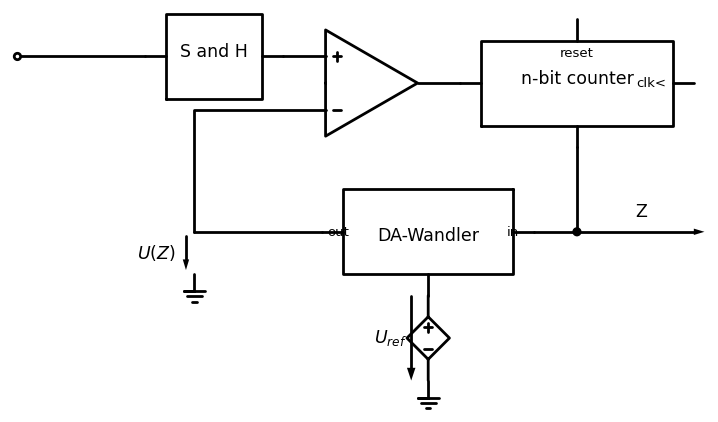

In [52]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += elm.Line()
    d += SH.anchor('in').drop('out')
    d += elm.Line().length(1)
    d += (cmp := elm.Opamp().anchor('in2').flip())
    d += elm.Line().length(1)
    
    d += counter.anchor('in')
    d += elm.Line().at(counter.out).down().length(2)
    d.push()
    d += elm.Line().left().length(1)
    d += DA_conv.anchor('in').drop('out')
    d += elm.Line().left()
    
    d.push()
    d += (g1 := elm.Ground().at((d.here[0], d.here[1]-1)))
    d.pop()
    d.push()
    d += (elm.Line(arrow='->').at((d.here[0]-.2, d.here[1]-.1)).to((d.here[0]-.2, g1.start[1]+.1))
          .label('$U(Z)$'))
    d.pop()
    d += elm.Wire('|-').to(cmp.in1)
    
    d += (ref := elm.SourceControlledV().reverse()
          .at(DA_conv.ref).down().length(2))
    d += elm.CurrentLabel().reverse().at(ref).label('$U_{ref}$')
    d += elm.Ground()
    
    d.pop()
    d += elm.Dot()
    d += elm.Line(arrow='->').right().label('Z')

#### Funktionsprinzip

Solange der DA gewandelte wert von Z kleiner als U_e ist (Komparator gibt $0$ aus),
    zählt der Counter nach oben.
Wenn der Wert größer als U_e ist (Komparator gibt $0$ aus).
    so zählt der Counter nach unten.
    Laufzeit: $O(2^n)$
    
Wenn sich der Eingang um weniger als $U_{LSB}\cdot f_{clk} \equiv \frac{[V]}{[s]}$ ändert,
    so kann das S\&H Glied weggelassen werden.
Dadurch folgt der Ausgangswert dem Eingangswert.

#### Diagramme

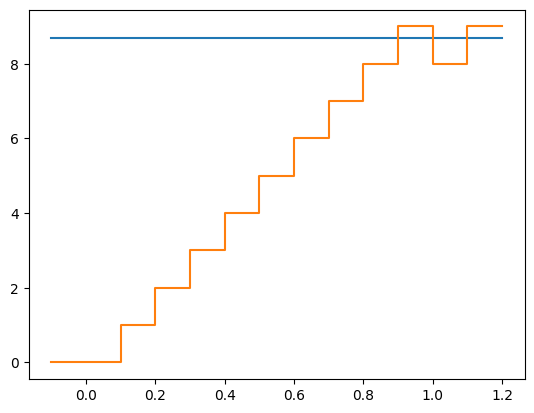

In [53]:
fig, ax = plt.subplots(1,1)
ax.plot([-.1, 1.2], [8.7, 8.7])

ax.plot([
    -.1, .1,
    .1, .2,
    .2, .3,
    .3, .4,
    .4, .5,
    .5, .6,
    .6, .7,
    .7, .8,
    .8, .9,
    .9, 1,
    1, 1.1,
    1.1, 1.2 
],[
    0, 0,
    1, 1,
    2, 2,
    3, 3,
    4, 4, 
    5, 5,
    6, 6,
    7, 7,
    8, 8,
    9, 9,
    8, 8,
    9, 9
])

## DA-Wandler

### R2R-Netzwerk

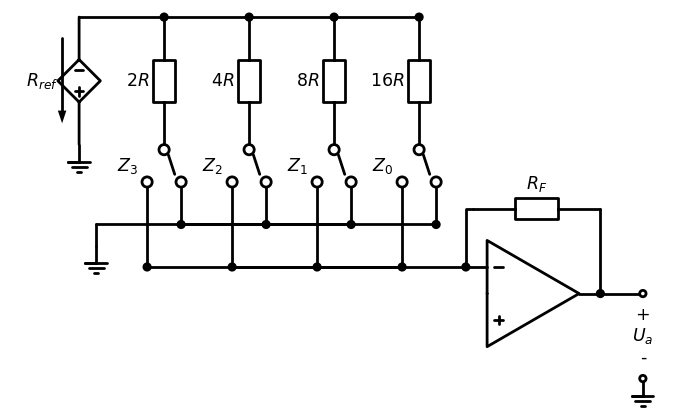

In [54]:
with schemdraw.Drawing() as d:
    d.push()
    d += (ref := elm.SourceControlledV().down())
    d += elm.CurrentLabel().reverse().at(ref).label('$R_{ref}$')
    d += elm.Ground()
    d.pop()
    
    zs = []
    N = 4
    for i in range(N-1, -1, -1):
        d += elm.Line().dot().length(2)
        d.push()
        nr = 2**(N-i)
        d += elm.ResistorIEC().down().label(f'${nr}R$')
        d += (z := elm.SwitchSpdt2().down().label(f'$Z_{i}$'))
        zs.append(z)
        d.pop()
    
    prev = None
    for z in zs:
        d += elm.Line().at(z.b).down().dot().length(1)
        if not prev:
            d.push()
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    d.pop()
    d += elm.Line().left().length(2)
    d += elm.Line().down().length(.5)
    d += elm.Ground()
    
    zs.reverse()
    prev = None
    for z in zs:
        d += elm.Line().at(z.c).down().dot().length(2)
        if not prev:
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    
    d += elm.Line().length(1.5).dot()
    loop = d.here
    d += elm.Line().length(.5)
    d += (amp := elm.Opamp().anchor('in1'))
    d += elm.Line().length(.5).dot()
    
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R_F$')
    d += elm.Wire('-|').to(loop)
    d.pop()
    
    d += elm.Line().length(1)
    d += elm.Dot(open=True)
    d += elm.Gap().down().label(('+', '$U_a$','-')).length(2)
    d += elm.Dot(open=True)
    d += elm.Ground()

### Prinzip der gewichteten Ströme

Nach Überlagerungs-Prinzip Summe von jeden einzelnen Pfad.

$U_a = -U_{ref}\cdot \left(Z_3\cdot\frac{R_F}{2R} + Z_2\cdot\frac{R_F}{4R} + Z_1\cdot\frac{R_F}{8R} + Z_0\cdot\frac{R_F}{16R}\right)$  
$U_a = -U_{ref} \cdot \frac{R_F}{16R}\cdot (8\cdot Z_3 + 4\cdot Z_2 + 2 \cdot Z_1 + Z_0)$  
In dieser Form gut einsehbar, jeder Schalter representiert ein Bit.  
$\forall Z_i \in \{0, 1\}$  
$U_a = -U_{ref} \cdot\frac{R_F}{16R}\cdot Z = -U_{ref}\cdot\frac{R_F}{R}\cdot \frac{Z}{Z_{max}  +1}$

Strom ist unabhängig von Z.  
$I'  = U_{ref} \cdot \frac{Z}{Z_{max} + 1}\cdot \frac{1}{R}$  
$I'' = \frac{U_{ref}}{R}\cdot \frac{Z_{max} - Z}{Z_{max} + 1}$

$I = I' + I''$  
nicht von $Z$ abhängig

### Inverses R2R-Netzwerk

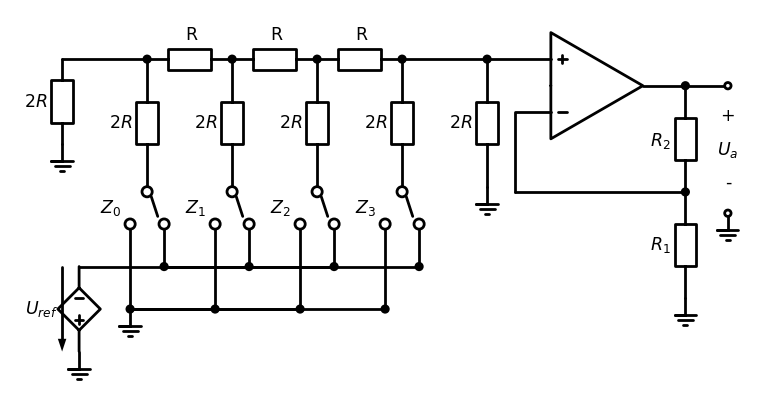

In [55]:
with schemdraw.Drawing() as d:
    d.push()
    d += elm.ResistorIEC().down().length(2).label('$2R$')
    d += elm.Ground()
    d.pop()
    
    zs = []
    N = 4
    for i in range(N):
        if not (i == 0):
            d += elm.ResistorIEC().dot().length(2).label('R')
        else:
            d += elm.Line().dot().length(2)
        d.push()
        d += elm.ResistorIEC().down().label(f'$2R$')
        d += (z := elm.SwitchSpdt2().down().label(f'$Z_{i}$'))
        zs.append(z)
        d.pop()
    d.push()
    
    prev = None
    for z in zs:
        d += elm.Line().at(z.b).down().dot().length(1)
        if not prev:
            d.push()
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    d.pop()
    d += elm.Line().left().length(2)
    d += (ref := elm.SourceControlledV().down().length(2))
    d += elm.CurrentLabel().at(ref).reverse().label('$U_{ref}$')
    d += elm.Ground()
    
    prev = None
    for z in zs:
        d += elm.Line().at(z.c).down().dot().length(2)
        if not prev:
            d.push()
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    d.pop()
    d += elm.Ground()
    
    d.pop()
    d += elm.Line().length(2).dot()
    d.push()
    d += elm.ResistorIEC().down().label('$2R$')
    d += elm.Ground()
    d.pop()
    
    d += elm.Line().length(1.5)
    d += (amp := elm.Opamp().anchor('in2').flip())
    d += elm.Line().at(amp.out).length(1).dot()
    
    d.push()
    d += elm.ResistorIEC().down().length(2.5).dot().label('$R_2$')
    d.push()
    d += elm.Line().left().length(4)
    d += elm.Wire('|-').to(amp.in1)
    d.pop()
    
    d += elm.ResistorIEC().down().length(2.5).label('$R_1$')
    d += elm.Ground()
    d.pop()
    d += elm.Line().length(1)
    d += elm.Gap().down().label(('+', '$U_a$', '-')).dot(open=True).idot(open=True)
    d += elm.Ground()

Bei Überlagerung alle Werte bis zum Schalter kollabieren zu 2R

Durch Teilung danach,
    $\varphi_+ = Z_3 \cdot \frac{U_{ref}}{3} + Z_2 \cdot \frac{U_{ref}}{6} + Z_1 \cdot \frac{U_{ref}}{12} + Z_0 \cdot \frac{U_{ref}}{24}$  
$\varphi_+ = \frac{U_{ref}}{24} \cdot (8 \cdot Z_3 + 4 \cdot Z_2 +  2 \cdot Z_1 + Z_0)$   
$\varphi_+ = \frac{U_{ref}}{24}\cdot Z = \frac{16}{16}\cdot \frac{U_{ref}}{24}\cdot Z$  

$U_a = \frac{U_{ref}}{3}\cdot \frac{Z}{Z_{max}} \cdot \left(1 + \frac{R_2}{R_1} \right)$

# Industrielle Anwenung

## Bustopologie und Zugriffsverfahren

### Bustopologievarianten

### Master-Slave-Prinzip

### CSMA/CD

### CSMA/CA

### Wired-AND

## Serielle Schnittstelle

### RS232

### Störeinflüsse

### Differenzielle Datenübertragung

### Twistet-Pair

## MAX-232-Ladungspumpenprinzip

## Datensicherungsverfahren

### Paritätsbit

### Hamming-Distanz

## CRC (Cycle Redundancy Check)

### Grundprinzip

### Generatorpolynom

### Rechnenprinzip

### Fehlererkennung

## I2C

### Spezifikation

### Adressierung

### Wired-AND

### Datanübertragunsrahmen

### Ablauf Datensenden und Datenempfang

### Busarbitrierung

## Can

### Spezifikation

### Adressierung

### Wired-AND

### Datanübertragunsrahmen

### Ablauf Datensenden und Datenempfang

### Busarbitrierung

### Physikalische und Strukturelle Fehlererkennungsmasnahmen

### Bit-Stuffing

## OSI-ISO-Modell für Schnittstellen

# Regelungstechnik

## Regelkreis

### Standardregelkreis

### Blockschaltbild

### Bestimmung Sprungantwort

### Ü-Funktion zwischen Ausgängen und Eingängen von Regelkreisen

### Beschreibung im Zeit- und Frequenzbereich

### Rückwirkungsfreiheit 

## Übertragungsfunktion

## Laplace-Transformation

### Vorgehensweise bei Systemantwort (Sprungantwort)

### Anwendung von AWT, EWT

### Partialbruchzerlegung für $\mathscr{L}^{-1}$

### Inverse Laplace-Transformation mittels Transformationstabelle

## RT-Modelle der OPV-Grundschaltung

### Inv. und nicht inv OPV-Verstärker

### Bestimmung der OPV-Verstärkung

### Auswirkung auf die Regelabweichung

## Zusammengesetzte Frequenzgänge 

### Knickzug vom Amplituden- und Phasengang

### Zerlegung von Übertragungsfunktionen in Grundglieder

### Rekonstruktion von $G(s)$ aus Amplitudenverlauf

## Grundglieder

### I

#### Übertragungsfunktion

#### Sprungantwort

#### Bode-Diagramm

#### OPV-Schaltung

### P

#### Übertragungsfunktion

#### Sprungantwort

#### Bode-Diagramm

#### OPV-Schaltung

### D

#### Übertragungsfunktion

#### Sprungantwort

#### Bode-Diagramm

#### OPV-Schaltung

### PT1

#### Übertragungsfunktion

#### Sprungantwort

#### Bode-Diagramm

#### OPV-Schaltung

### PI

#### Übertragungsfunktion

#### Sprungantwort

#### Bode-Diagramm

#### OPV-Schaltung

### PD

#### Übertragungsfunktion

#### Sprungantwort

#### Bode-Diagramm

#### OPV-Schaltung

### DT1

#### Übertragungsfunktion

#### Sprungantwort

#### Bode-Diagramm

#### OPV-Schaltung

### IT1

#### Übertragungsfunktion

#### Sprungantwort

#### Bode-Diagramm

#### OPV-Schaltung

### PDT1

#### Übertragungsfunktion

#### Sprungantwort

#### Bode-Diagramm

#### OPV-Schaltung

## OPV Schaltung der RT

### OPV-Schaltung der Grundglieder

### OPV-Schaltung aus Blockdiagramm

### OPV-Schaltung für Summen- und Differenzknoten

## PT $_2$ Element

### Beschreibung im Frequenz- und Zeitbereich

### Kenngrößen

### Überschwingen

### Schwingunsmaxima

### Identifikation im Zeitbereich

### Bedeutung für die Regelungstechnik

## Nyquist Kriteritum

#### Stabilitätsgrenzen

#### Offener und geschlossener Regelkreis

#### Phasenrand

#### Amplitudenrand

#### Faustregeln

#### Phasenrand vs. Überschwingen